In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: >

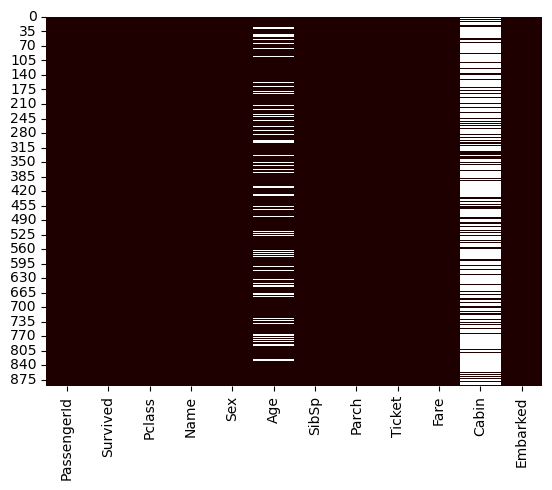

In [18]:
sns.heatmap(train.isnull(), cbar=False, cmap= 'pink')

In [19]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<function seaborn.categorical.countplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, stat='count', width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', ax=None, **kwargs)>

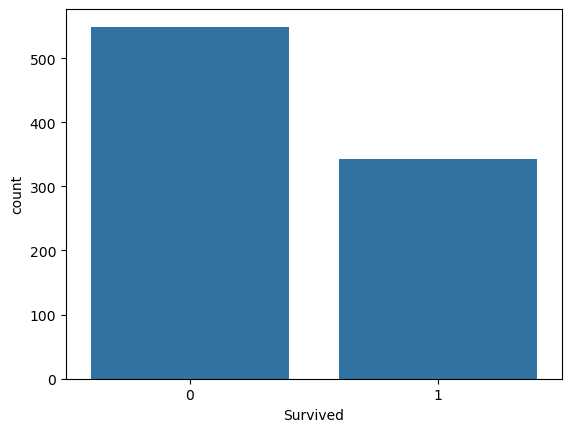

In [22]:
sns.countplot(x='Survived', data=train)
sns.countplot


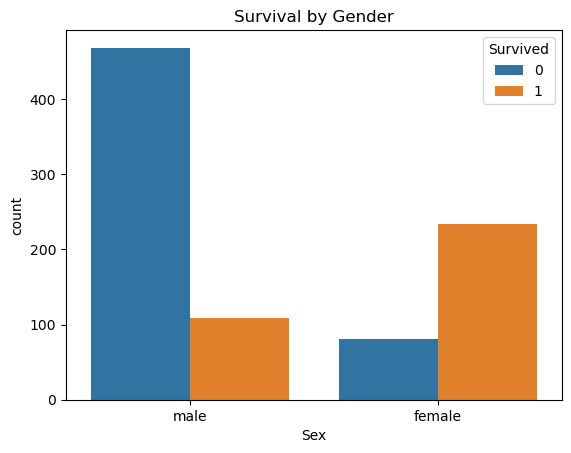

In [24]:
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Survival by Gender')
plt.show()

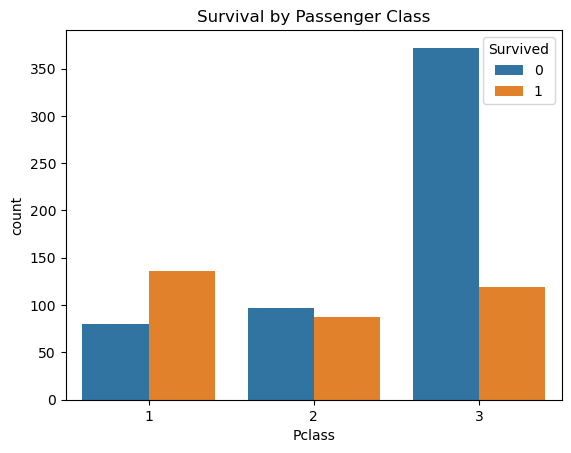

In [25]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival by Passenger Class')
plt.show()

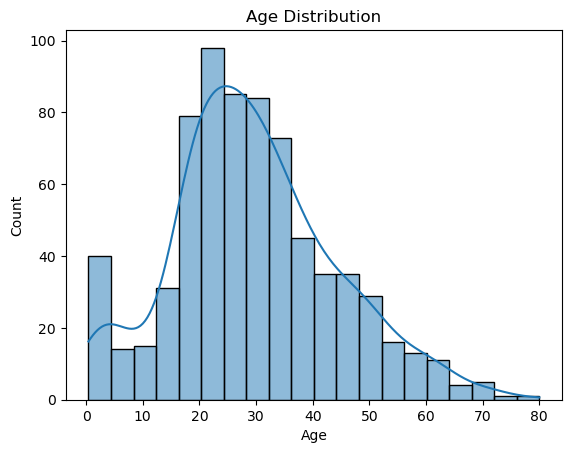

In [26]:
sns.histplot(train['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

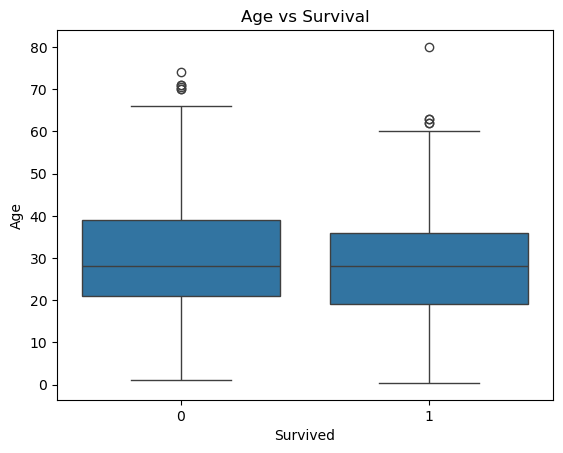

In [27]:
sns.boxplot(x='Survived', y='Age', data=train)
plt.title('Age vs Survival')
plt.show()

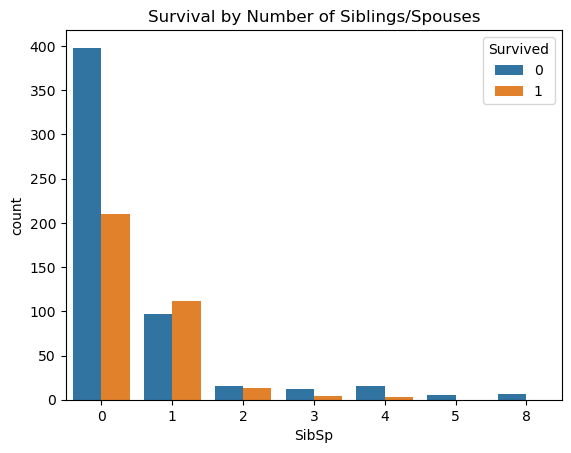

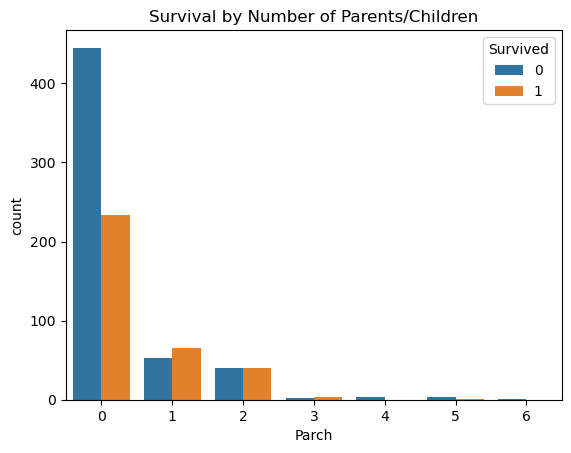

In [28]:
sns.countplot(x='SibSp', hue='Survived', data=train)
plt.title('Survival by Number of Siblings/Spouses')
plt.show()

sns.countplot(x='Parch', hue='Survived', data=train)
plt.title('Survival by Number of Parents/Children')
plt.show()

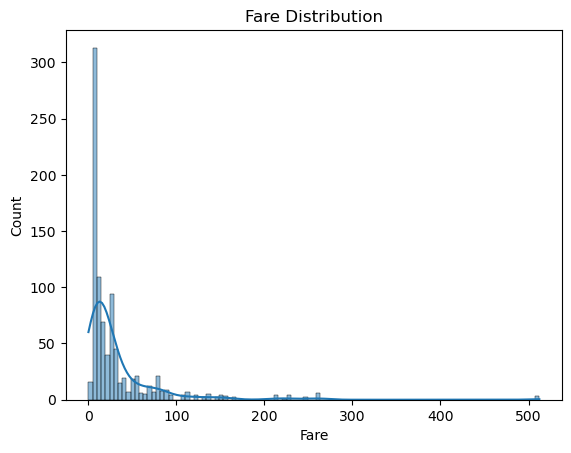

In [29]:
sns.histplot(train['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

 ## Data cleaning and preprocessing

In [30]:
train.drop(columns=['Name', 'Ticket', 'Cabin','Embarked'], axis = 1 ,inplace=True)
test.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1 ,inplace=True)

In [31]:
train['Age'] = SimpleImputer(strategy='median').fit_transform(train[['Age']])
test['Age'] = SimpleImputer(strategy='median').fit_transform(test[['Age']])

In [32]:
train['Fare_band'] = pd.qcut(train['Fare'], 4, labels=[1, 2, 3, 4])
train.drop('Fare', axis=1, inplace=True)

In [33]:
categorical_features = train.select_dtypes(include=['object']).columns

for col in categorical_features:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])

In [34]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare_band
0,1,0,3,1,22.0,1,0,1
1,2,1,1,0,38.0,1,0,4
2,3,1,3,0,26.0,0,0,2
3,4,1,1,0,35.0,1,0,4
4,5,0,3,1,35.0,0,0,2


In [35]:
test['Fare_band'] = pd.qcut(test['Fare'], 4, labels=[1, 2, 3, 4])
test.drop('Fare', axis=1, inplace=True)

In [36]:
categorical_cols = test.select_dtypes(include='object').columns
for col in categorical_cols:
    test[col] = LabelEncoder().fit_transform(test[col])

In [37]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [39]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare_band
0,1,3,1,22.0,1,0,1
1,2,1,0,38.0,1,0,4
2,3,3,0,26.0,0,0,2
3,4,1,0,35.0,1,0,4
4,5,3,1,35.0,0,0,2


In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare_band
0,-1.730108,0.827377,0.737695,-0.565736,0.432793,-0.473674,-1.339737
1,-1.726220,-1.566107,-1.355574,0.663861,0.432793,-0.473674,1.344758
2,-1.722332,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.444905
3,-1.718444,-1.566107,-1.355574,0.433312,0.432793,-0.473674,1.344758
4,-1.714556,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.444905
...,...,...,...,...,...,...,...
886,1.714556,-0.369365,0.737695,-0.181487,-0.474545,-0.473674,-0.444905
887,1.718444,-1.566107,-1.355574,-0.796286,-0.474545,-0.473674,0.449927
888,1.722332,0.827377,-1.355574,-0.104637,0.432793,2.008933,0.449927
889,1.726220,-1.566107,0.737695,-0.258337,-0.474545,-0.473674,0.449927


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=1)

In [45]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear', C=1),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski'),
    "Naive Bayes": GaussianNB(var_smoothing=1e-9),
    "SVM": SVC(kernel='linear', C=1, gamma='scale'),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=1, criterion='gini')}

Logistic Regression Accuracy: 0.7821
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       110
           1       0.73      0.70      0.71        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

[[92 18]
 [21 48]]


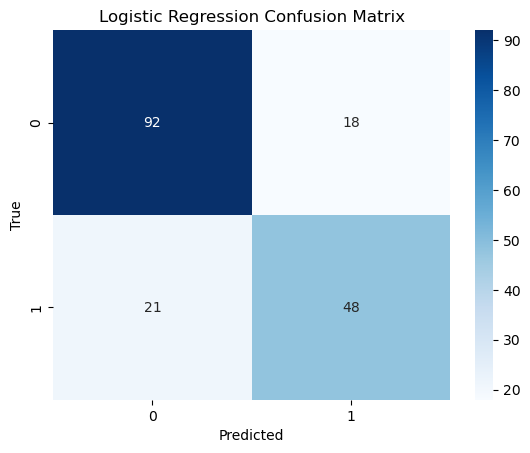

Random Forest Accuracy: 0.8436
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       110
           1       0.84      0.74      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

[[100  10]
 [ 18  51]]


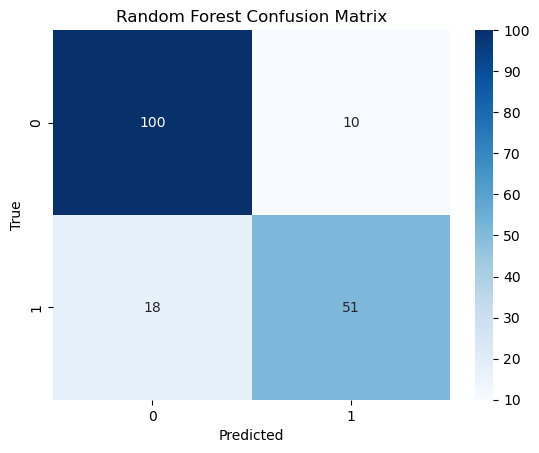

KNN Accuracy: 0.8268
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179

[[98 12]
 [19 50]]


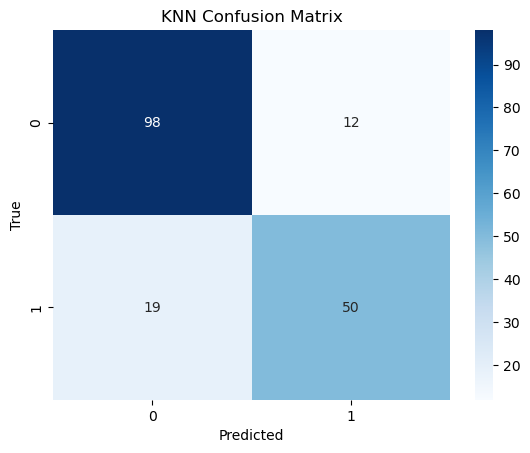

Naive Bayes Accuracy: 0.7598
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       110
           1       0.66      0.77      0.71        69

    accuracy                           0.76       179
   macro avg       0.75      0.76      0.75       179
weighted avg       0.77      0.76      0.76       179

[[83 27]
 [16 53]]


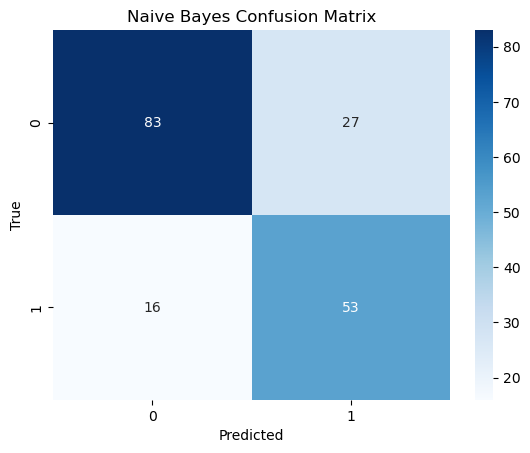

SVM Accuracy: 0.8045
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.76      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

[[94 16]
 [19 50]]


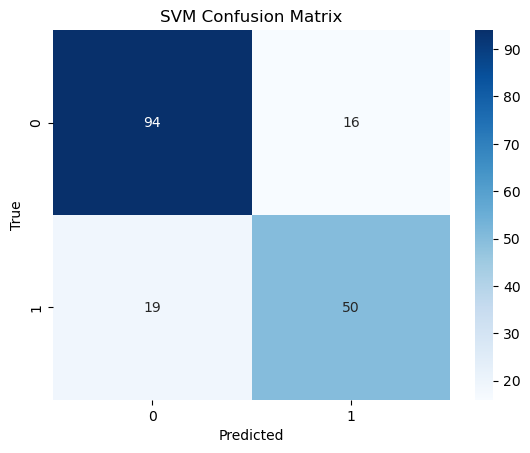

Decision Tree Accuracy: 0.8101
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       110
           1       0.80      0.68      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179

[[98 12]
 [22 47]]


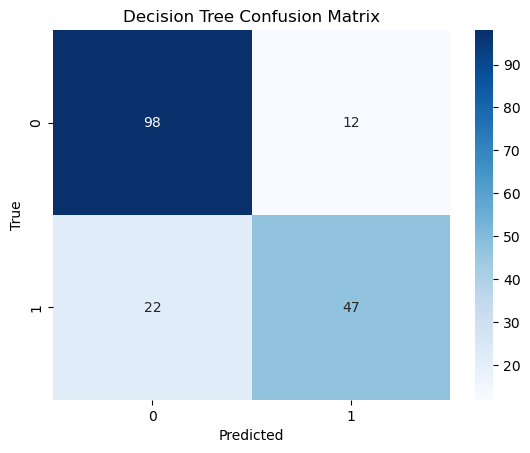

In [46]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [47]:
# Initialize results list
classification_results = []

# Loop through each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on train and test sets
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Get accuracy
    train_acc = accuracy_score(y_train, train_preds)
    test_acc = accuracy_score(y_test, test_preds)

    # Get classification report as dictionary
    report = classification_report(y_test, test_preds, output_dict=True)

    # Append key metrics to table
    classification_results.append({
        "Model": name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1 Score": report["weighted avg"]["f1-score"]
    })

# Create and display summary table
results_df = pd.DataFrame(classification_results)
results_df = results_df.round(4)
print("🔍 Classification Model Comparison Table:\n")
print(results_df.to_string(index=False))

🔍 Classification Model Comparison Table:

              Model  Train Accuracy  Test Accuracy  Precision  Recall  F1 Score
Logistic Regression          0.8034         0.7821     0.7807  0.7821    0.7812
      Random Forest          0.9537         0.8492     0.8485  0.8492    0.8475
                KNN          0.8624         0.8268     0.8256  0.8268    0.8249
        Naive Bayes          0.7767         0.7598     0.7706  0.7598    0.7623
                SVM          0.7823         0.8045     0.8032  0.8045    0.8036
      Decision Tree          0.9565         0.8045     0.8029  0.8045    0.8015


## **Predicted**

In [48]:
best_model = models["Random Forest"]
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [49]:
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns.drop('Survived', errors='ignore')
categorical_cols = train.select_dtypes(include=['object', 'category']).columns


num_imputer = SimpleImputer(strategy='mean')
num_imputer.fit(train[numeric_cols])


cat_imputer = SimpleImputer(strategy='most_frequent')
cat_imputer.fit(train[categorical_cols])


common_numeric = [col for col in numeric_cols if col in test.columns]
common_categorical = [col for col in categorical_cols if col in test.columns]

In [50]:
test[common_numeric] = num_imputer.transform(test[common_numeric])
test[common_categorical] = cat_imputer.transform(test[common_categorical])

In [51]:
pre_scaled = scaler.transform(test)

In [52]:
id = test['PassengerId']

In [53]:
pre = best_model.predict(pre_scaled)

In [54]:
submission = pd.DataFrame({'PassengerId': id, 'Survived': pre})

In [55]:
submission

,PassengerId,Survived
0,892.0,0
1,893.0,0
2,894.0,0
3,895.0,0
4,896.0,0
...,...,...
413,1305.0,0
414,1306.0,1
415,1307.0,0
416,1308.0,0


In [56]:
submission.shape

(418, 2)

In [58]:
submission["PassengerId"] = submission["PassengerId"].astype(int)
submission.to_csv("../data/submission.csv", index=False)